In [1]:
import pandas as pd

In [2]:
from sqlite3 import connect

In [3]:
opsim_db = connect('baseline_v2.0_10yrs.db')

In [4]:
opsim_file = pd.read_sql('select * from observations limit 1000', opsim_db)

In [5]:
opsim_file.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'numExposures', 'airmass', 'seeingFwhm500', 'seeingFwhmEff',
       'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime', 'visitTime',
       'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth', 'paraAngle',
       'cloud', 'moonAlt', 'sunAlt', 'note', 'fieldId', 'proposalId',
       'block_id', 'observationStartLST', 'rotTelPos', 'moonAz', 'sunAz',
       'sunRA', 'sunDec', 'moonRA', 'moonDec', 'moonDistance', 'solarElong',
       'moonPhase', 'cummTelAz'],
      dtype='object')

In [6]:
'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD', 'fieldId', 'filter', 'fiveSigmaDepth'

('observationId',
 'fieldRA',
 'fieldDec',
 'observationStartMJD',
 'fieldId',
 'filter',
 'fiveSigmaDepth')

In [7]:
band_obs = pd.read_sql_query('SELECT observationId, fieldRA, fieldDec, observationStartMJD, fieldId, filter, fiveSigmaDepth FROM observations', opsim_db)

In [8]:
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth
0,0,310.024480,-60.812928,60218.001806,-1,y,22.370557
1,1,310.601871,-63.561425,60218.002254,-1,y,22.338327
2,2,311.292611,-66.317774,60218.002703,-1,y,22.295487
3,3,312.140731,-69.082666,60218.003152,-1,y,21.270421
4,4,304.170163,-73.375442,60218.003624,-1,y,21.205276
...,...,...,...,...,...,...,...
2086975,2086975,338.528926,-55.399555,63870.104267,-1,y,21.917628
2086976,2086976,347.380828,-54.922128,63870.104758,-1,y,21.864586
2086977,2086977,350.974688,-52.986827,63870.105219,-1,y,21.871581
2086978,2086978,356.062503,-53.778759,63870.105677,-1,y,21.850527


In [9]:
import matplotlib.pyplot as plt
%matplotlib Inline

Text(0, 0.5, 'DEC')

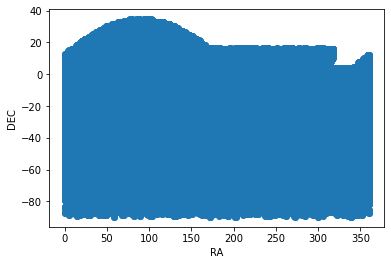

In [10]:
plt.scatter(band_obs['fieldRA'], band_obs['fieldDec'])
plt.xlabel('RA')
plt.ylabel('DEC')

In [11]:
import matplotlib as npl

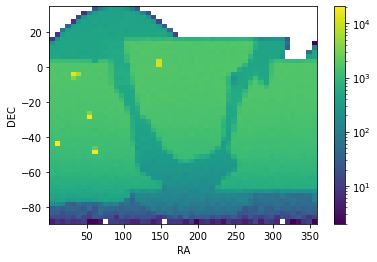

In [12]:
plt.hist2d(band_obs['fieldRA'], band_obs['fieldDec'], bins = 50, norm=npl.colors.LogNorm())
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

In [13]:
import numpy as np

In [14]:
find_max_RA = np.max(band_obs['fieldRA'])
find_min_RA = np.min(band_obs['fieldRA'])
find_max_DEC = np.max(band_obs['fieldDec'])
find_min_DEC = np.min(band_obs['fieldDec'])
num_bins = 50

In [15]:
RA_set = np.linspace(find_min_RA, find_max_RA, num_bins+1)
DEC_set = np.linspace(find_min_DEC, find_max_DEC, num_bins+1)

In [16]:
RA_bins = np.digitize(band_obs['fieldRA'], RA_set, right=True)
RA_bins

array([44, 44, 44, ..., 49, 50, 49])

In [17]:
DEC_bins = np.digitize(band_obs['fieldDec'], DEC_set, right=True)
DEC_bins

array([12, 11, 10, ..., 15, 15, 14])

In [18]:
band_obs['RABins'] = RA_bins
band_obs['DECBins'] = DEC_bins

In [19]:
new_field_id = (RA_bins-1) * 50 + DEC_bins
band_obs['fieldId'] = new_field_id
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins
0,0,310.024480,-60.812928,60218.001806,2162,y,22.370557,44,12
1,1,310.601871,-63.561425,60218.002254,2161,y,22.338327,44,11
2,2,311.292611,-66.317774,60218.002703,2160,y,22.295487,44,10
3,3,312.140731,-69.082666,60218.003152,2159,y,21.270421,44,9
4,4,304.170163,-73.375442,60218.003624,2107,y,21.205276,43,7
...,...,...,...,...,...,...,...,...,...
2086975,2086975,338.528926,-55.399555,63870.104267,2364,y,21.917628,48,14
2086976,2086976,347.380828,-54.922128,63870.104758,2415,y,21.864586,49,15
2086977,2086977,350.974688,-52.986827,63870.105219,2415,y,21.871581,49,15
2086978,2086978,356.062503,-53.778759,63870.105677,2465,y,21.850527,50,15


In [20]:
r_filter = band_obs.query('fieldId == 2403 and filter == "r"')
g_filter = band_obs.query('fieldId == 2403 and filter == "g"')
print(r_filter, g_filter)

         observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
772                772  349.857034 -82.633511         60218.357890     2403   
846124          846124  349.132762 -83.345848         61682.142242     2403   
860288          860288  349.770490 -84.147058         61703.077226     2403   
1680668        1680668  349.123067 -82.933787         63159.185750     2403   
1875208        1875208  346.865503 -83.230118         63536.152786     2403   

        filter  fiveSigmaDepth  RABins  DECBins  
772          r       22.115278      49        3  
846124       r       23.833470      49        3  
860288       r       23.336416      49        3  
1680668      r       23.423731      49        3  
1875208      r       23.918868      49        3            observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
1259256        1259256  351.795196 -83.451359         62442.066218     2403   
1478871        1478871  346.629750 -83.641666         62802.056051 

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = '/home/jovyan/uw-premap-2022-photoz/data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [22]:
fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = '/home/jovyan/uw-premap-2022-photoz/data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [23]:
import rubin_sim.photUtils.Bandpass as Bandpass
import rubin_sim.photUtils.Sed as Sed

In [24]:
sun = Sed()
sun.readSED_flambda('/home/jovyan/uw-premap-2022-photoz/data/sed_templates/CWW_KINNEY/CWW_E_ext.sed')
sun.wavelen/=10

In [25]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']

lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].readThroughput(os.path.join(fdir, f'total_{f}.dat'))
    
mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])

# Make a dataframe just to get a nice output cell.
pd.DataFrame(mags, index=['Sun']).T

,Sun
u,-4.150003
g,-5.896804
r,-6.622219
i,-6.974888
z,-7.233845
y,-7.425142


In [26]:
r = 20.0

fluxNorm = sun.calcFluxNorm(r, lsst['r'])

sun.multiplyFluxNorm(fluxNorm)

mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])
    
pd.DataFrame(mags, index=['Distant Sun']).T

,Distant Sun
u,22.472216
g,20.725415
r,20.000000
i,19.647330
z,19.388374
y,19.197076


In [27]:
from rubin_sim.photUtils import SignalToNoise
from rubin_sim.photUtils import PhotometricParameters

In [28]:
SignalToNoise.calcMagError_m5(magnitude=20, bandpass=lsst['r'], m5=24, photParams=PhotometricParameters())
SignalToNoise.calcMagError_m5(magnitude=20.725415, bandpass=lsst['g'], m5=24, photParams=PhotometricParameters())

(0.013139422508835895, 0.03934261437469505)

In [29]:
mag_error_r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 22.115278, PhotometricParameters())
mag_error_2r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 23.833470, PhotometricParameters())
print(mag_error_r)
print(mag_error_2r)

0.031221444804164934
0.009322245115585407


In [30]:
mag_error_g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 23.803613 , PhotometricParameters())
mag_error_2g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 24.005959, PhotometricParameters())
print(mag_error_g, mag_error_2g)

0.014857161547721024 0.013093479367888855


In [31]:
mag_2 = 20
mag_1 = 20.725415
def combine_col_err(mag_1, mag_2, err_1, err_2):
    return mag_1-mag_2, np.sqrt(mag_error_g**2 + mag_error_r**2)

In [32]:
gmr_error = combine_col_err(mag_1, mag_2, mag_error_g, mag_error_r)

In [33]:
gmr_error


(0.7254150000000017, 0.0345762037377529)

In [36]:
from copy import copy
g_r = []
g_r_err = []
r = 20
for redshift in np.arange(0,3.1,0.1):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(redshift)
    mags = {}
    fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
    sun_copy.multiplyFluxNorm(fluxNorm)
    mags = {}
    for f in filterlist:
        mags[f] = sun_copy.calcMag(lsst[f])
        pd.DataFrame(mags, index=['Distant Sun']).T
    g_r.append(mags['g'] - mags['r'])
    mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], 23.803613 , PhotometricParameters())
    mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], 22.115278, PhotometricParameters())
    g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))

print(g_r, g_r_err)

[0.7254152168005632, 0.9092875263745306, 1.21556563554606, 1.5101335745430582, 1.7336961338800663, 1.6247841723966872, 1.564944229071827, 1.6311809361247, 1.8812287964095908, 2.1275688391658214, 2.2677011843884642, 2.1867075250048273, 1.85280724367788, 1.4936730257264017, 1.124049610999844, 0.8557468597614353, 0.7198391764086622, 0.7096387142844485, 0.747772632412822, 0.775066648109842, 0.7663830025511693, 0.7227059844917534, 0.6590263915621222, 0.596234550083885, 0.5445307149382153, 0.5088881288988105, 0.49157515750705727, 0.49131807795932403, 0.5034478075371567, 0.5257928424279505, 0.5554684677789723] [0.034576204753350964, 0.03557609199399158, 0.03802713549048843, 0.041707749577668964, 0.04570763141335048, 0.04360829133304583, 0.04257910600053231, 0.04372333426832906, 0.04907075260641221, 0.056253425678307156, 0.06136460907796936, 0.05831174188923004, 0.04837279151576705, 0.041458749476887075, 0.03717165202643575, 0.03525445926284531, 0.034550199584966974, 0.03450322139619315, 0.034

In [ ]:
# g_r_err on x-axis, g_r on y-axis

Text(0, 0.5, 'Color')

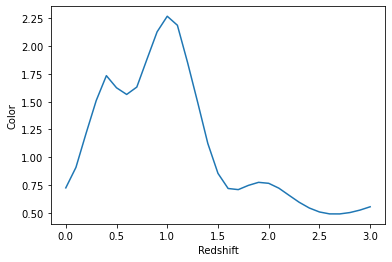

In [40]:
redshift_r = np.arange(0,3.1,0.1)
plt.plot(redshift_r, g_r)
plt.xlabel("Redshift")
plt.ylabel("Color")